In [7]:
import pandas as pd
from numpy import cumsum, log, polyfit, sqrt, std, subtract
from numpy.random import randn
import numpy as np

from scipy import stats
import matplotlib.pylab as plt

In [2]:
data = pd.read_csv('STORAGE_data/eurusd.csv')
normal_datetime = data
data

,Date,Open,High,Low,Close
0,1/1/2013 19:00,1.319825,1.319825,1.319325,1.319475
1,1/1/2013 19:01,1.319475,1.319575,1.319175,1.319550
2,1/1/2013 19:02,1.319550,1.319750,1.319500,1.319650
3,1/1/2013 19:03,1.319650,1.319675,1.319575,1.319575
4,1/1/2013 19:04,1.319575,1.319650,1.319575,1.319650
...,...,...,...,...,...
980745,8/28/2015 16:55,1.118575,1.118600,1.118250,1.118400
980746,8/28/2015 16:56,1.118400,1.118525,1.118250,1.118275
980747,8/28/2015 16:57,1.118275,1.118425,1.118100,1.118225
980748,8/28/2015 16:58,1.118225,1.118350,1.118150,1.118275


In [3]:
normal_datetime.index = pd.to_datetime(normal_datetime.Date)

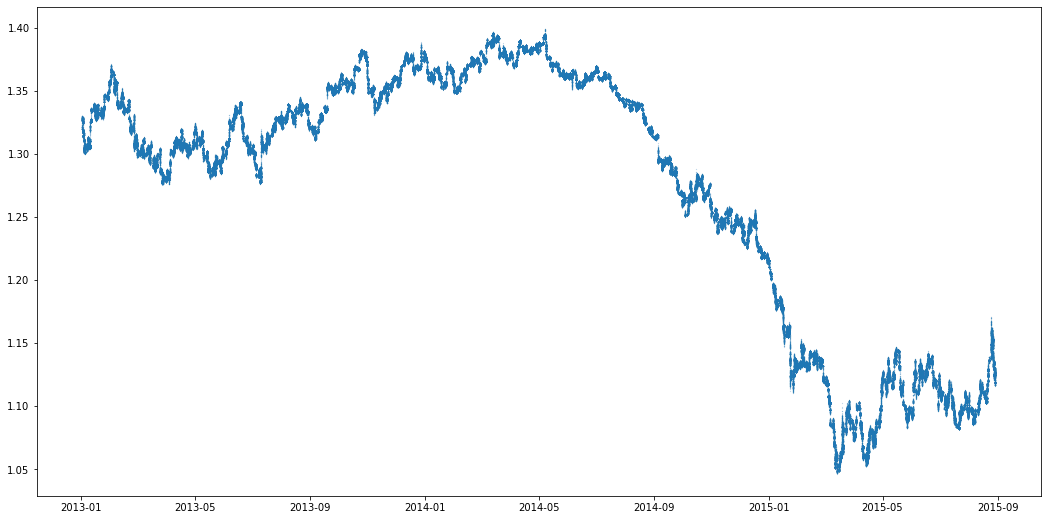

In [4]:
plt.figure(figsize=(18,9))
plt.plot(normal_datetime.Open, 'o', markersize=.1)
plt.show()

<AxesSubplot:xlabel='Date'>

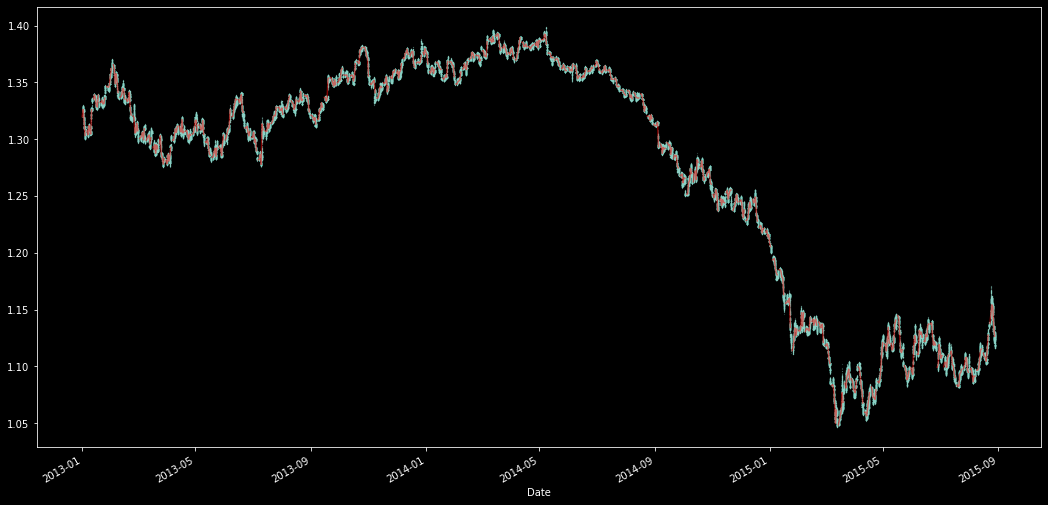

In [54]:
part_data = normal_datetime.resample('1D').first()
plt.style.use('dark_background')
plt.figure(figsize=(18,9))
plt.plot(normal_datetime.Open, 'o', markersize=.1)
part_data['Open'].plot(color='red', alpha=.5)

In [86]:
hour_data = normal_datetime.resample('1D').first()
hour_data

,Date,Open,High,Low,Close
Date,,,,,
2013-01-01,1/1/2013 19:00,1.319825,1.319825,1.319325,1.319475
2013-01-02,1/2/2013 0:00,1.326100,1.326100,1.325975,1.326000
2013-01-03,1/3/2013 0:00,1.313775,1.313775,1.313775,1.313775
2013-01-04,1/4/2013 0:00,1.303325,1.303325,1.303275,1.303275
2013-01-05,None,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2015-08-24,8/24/2015 0:00,1.145525,1.145675,1.145300,1.145550
2015-08-25,8/25/2015 0:00,1.154150,1.154225,1.154000,1.154050
2015-08-26,8/26/2015 0:00,1.152225,1.152225,1.152025,1.152175


In [79]:
import numpy as np
from scipy import stats
def variance_ratio_test(log_prices, time_lag):
    rets = np.diff(log_prices)
    T = len(rets)
    mean_log_ret = np.mean(rets)
    sqr_subtraction = np.square(rets - mean_log_ret)
    Var_1 = np.sum(sqr_subtraction) / (T-1)
    rets_q_lag = (log_prices - np.roll(log_prices, time_lag))[time_lag:]
    m_const= time_lag * (T - time_lag + 1) * (1 - time_lag / T)
    Var_k = 1 / m_const * np.sum(np.square(rets_q_lag - time_lag * mean_log_ret))
    VR = Var_k /Var_1
    a_array = np.array([round((2*(time_lag - i) / time_lag) ** 2, 4) for i in range(1, time_lag)])
    b_arr = np.empty(time_lag - 1, dtype=np.float64)
    for j in range(1, time_lag):
        b_arr[j - 1] = np.sum((sqr_subtraction * np.roll(sqr_subtraction, j))[j+1:])
    delta_array = T * b_arr / np.square(np.sum(sqr_subtraction))
    #assert len(delta_array) == len(a_array) == time_lag - 1
    phi1 = 2 * (2 * time_lag - 1) * (time_lag - 1) / (3 * time_lag * T)
    phi2 = np.sum(a_array * delta_array) / T

    VR_STAT_HOMO = (VR - 1) / np.sqrt(phi1)
    VR_STAT_HETERO = (VR - 1) / np.sqrt(phi2)
    return VR, VR_STAT_HOMO, VR_STAT_HETERO

def estimator(input_data):
    for time_lag in [5, 6, 8, 10, 15, 20, 30, 40, 50, 100, 200, 300, 500, 1000, 2000, 3000, 5000, 9000]:
        vr, homo, hetero = variance_ratio_test(np.log(input_data), time_lag)
        print(f"Variance Ration for time_lag={time_lag}: {vr} \n HOMO: {homo}, p_value = {stats.norm.cdf(homo)} \n HETERO: {hetero}, p_value = {stats.norm.cdf(hetero)} \n--------")


# for batch_size in np.arange(100, 100000, 30000):
#     print('==================')
#     print('SIZE IS:', batch_size)
#     estimator(np.log(hour_data.Close[:batch_size].dropna().values))
#     print('=====================')

In [81]:
estimator(np.log(hour_data['2013-01-01': '2014-01-01'].Close.dropna().values))

Variance Ration for time_lag=5: 0.9905456477429871 
 HOMO: -0.8301770119923103, p_value = 0.20321935519062634 
 HETERO: -0.4786179123924431, p_value = 0.31610523648777833 
--------
Variance Ration for time_lag=6: 0.9881797784906832 
 HOMO: -0.9198670610627282, p_value = 0.178821116861687 
 HETERO: -0.53597190214135, p_value = 0.29598898481730784 
--------
Variance Ration for time_lag=8: 0.9834817891282575 
 HOMO: -1.0742825517035273, p_value = 0.141348031409108 
 HETERO: -0.6381876823151503, p_value = 0.26167575724505987 
--------
Variance Ration for time_lag=10: 0.9765144565330675 
 HOMO: -1.3381590368204068, p_value = 0.09042229958836434 
 HETERO: -0.8084078839786297, p_value = 0.20942790744500595 
--------
Variance Ration for time_lag=15: 0.9611728604609192 
 HOMO: -1.7584222942162409, p_value = 0.039337841258403866 
 HETERO: -1.0966261089747862, p_value = 0.13640243465489765 
--------
Variance Ration for time_lag=20: 0.9469110031903994 
 HOMO: -2.0550177847183404, p_value = 0.01993

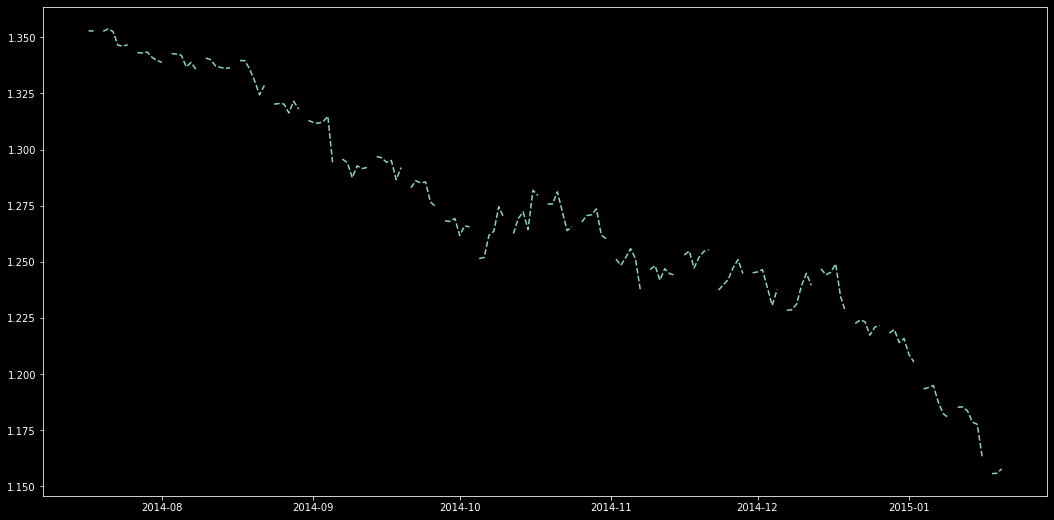

Hurst(PAPPER):  0.29469568874276847
Hurst(GBM):   0.5042363957779132
Hurst(MR):    0.0004259040065250394
Hurst(TR):    0.9428626083126992


In [127]:
from numpy import cumsum, log, polyfit, sqrt, std, subtract
from numpy.random import randn


def hurst(ts):
    """
    Returns the Hurst Exponent of the time series vector ts

    Parameters
    ----------
    ts : `numpy.array`
        Time series upon which the Hurst Exponent will be calculated

    Returns
    -------
    'float'
        The Hurst Exponent from the poly fit output
    """
    # Create the range of lag values
    lags = range(2, 50)

    # Calculate the array of the variances of the lagged differences
    tau = [sqrt(std(subtract(ts[lag:], ts[:-lag]))) for lag in lags]

    # Use a linear fit to estimate the Hurst Exponent
    poly = polyfit(log(lags), log(tau), 1)

    # Return the Hurst exponent from the polyfit output
    return poly[0]*2.0

hour_data = normal_datetime.resample('1D').first()['2014-07-17': '2015-01-20']
plt.style.use('dark_background')
plt.figure(figsize=(18,9))
plt.plot(hour_data.Close, '--', markersize=.5)
plt.show()
print("Hurst(PAPPER):  %s" % hurst(log(hour_data.Close.dropna().values)))

gbm = log(cumsum(randn(100000))+1000)
mr = log(randn(100000)+1000)
tr = log(cumsum(randn(100000)+1)+1000)

# Output the Hurst Exponent for each of the above series
# and the price of Google (the Adjusted Close price) for
# the ADF test given above in the article
print("Hurst(GBM):   %s" % hurst(gbm))
print("Hurst(MR):    %s" % hurst(mr))
print("Hurst(TR):    %s" % hurst(tr))

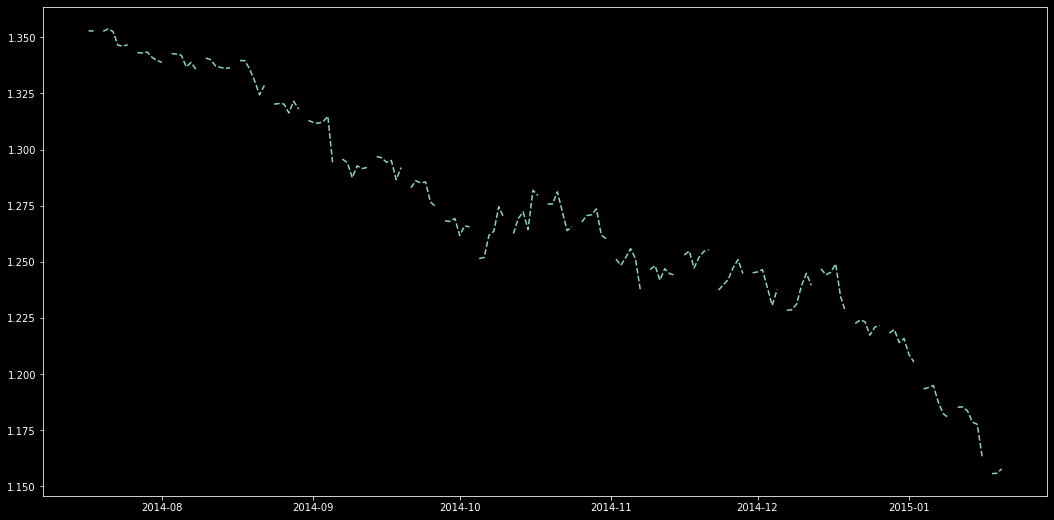

Hurst(PAPPER):  [-0.38142062  5.8378542 ]


In [126]:
def hurst(h,row,step): #h лучше брать больше 50, чтобы estimation был с нормальной погрешностью
    l = len(row) #row - ценовой ряд
    deviation = []
    log_RS = []

    for n in range(h,l,step):
        mean = np.mean(row[0:n])
        for k in range(0,n):
            deviation.append(row[k] - mean)

        S = np.sqrt(np.sum(np.square(deviation)) / n)
        R = np.max(np.cumsum(deviation)) - np.min(np.cumsum(deviation))
        log_RS.append(np.log(R/S))

    return np.polyfit(log_RS, np.log(range(h,l,1)), 1)

hour_data = normal_datetime.resample('1D').first()['2014-07-17': '2015-01-20']
plt.style.use('dark_background')
plt.figure(figsize=(18,9))
plt.plot(hour_data.Close, '--', markersize=.5)
plt.show()
print("Hurst(PAPPER):  %s" % hurst(100, log(hour_data.Close.dropna().values), 1))


gbm = log(cumsum(randn(100000))+1000)
mr = log(randn(100000)+1000)
tr = log(cumsum(randn(100000)+1)+1000)

# Output the Hurst Exponent for each of the above series
# and the price of Google (the Adjusted Close price) for
# the ADF test given above in the article
# print("Hurst(GBM):   %s" % hurst(50, gbm, 100))
# print("Hurst(MR):    %s" % hurst(50, mr, 100))
# print("Hurst(TR):    %s" % hurst(50, tr, 100))


In [28]:
def _hurst_estimator(inp_data, time_lag, start_position=0, show=True):
    inp_data = inp_data[start_position:]
    mean_time_lag = np.sum(inp_data[:time_lag]) / time_lag
    STD_on_lag = np.sqrt(np.sum(np.square(inp_data[:time_lag] - mean_time_lag)) / time_lag)
    STD_sample = [np.sum(inp_data[:t] - mean_time_lag) for t in range(len(inp_data))]
    R_LAG = max(STD_sample) - min(STD_sample)
    return np.log(R_LAG / STD_on_lag)


def new_hurst(inp_data, start_point='2014-07-17', end_point='2015-01-20'):
    HURST = list()
    X_dotes = list()
    inp_data = inp_data[start_point: end_point].Close.dropna().values
    inp_data = np.diff(inp_data)
    plt.style.use('dark_background')
    plt.figure(figsize=(12,6))
    plt.title(f'START: {start_point} END: {end_point}')
    for time_lag in np.arange(10, len(inp_data), 5):
        H = np.log(_hurst_estimator(inp_data, time_lag=time_lag))
        plt.plot(time_lag, H, 'o', color='red')
        HURST.append(H)
        X_dotes.append(time_lag)
    COFFS = np.polyfit(X_dotes, HURST, deg=1)
    plt.plot(X_dotes, np.array(X_dotes) * COFFS[0] + COFFS[1], '--', color='red')
    print(f"COFF HURST: {COFFS[0]}")
    plt.show()

#new_hurst(normal_datetime.resample('1D').first())

COFF HURST: -0.003137894364078313
COFF HURST: -0.0037980899907131753
COFF HURST: -0.008034924339023253


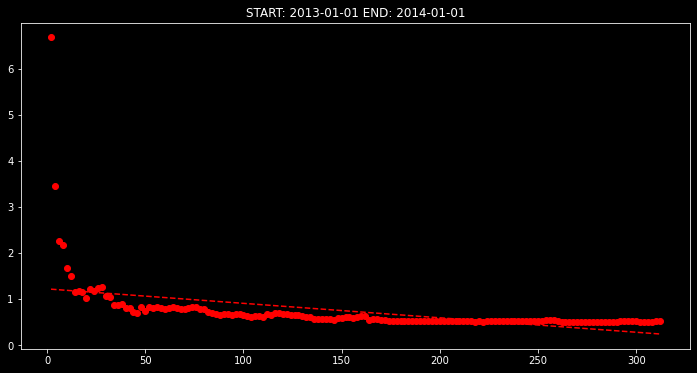

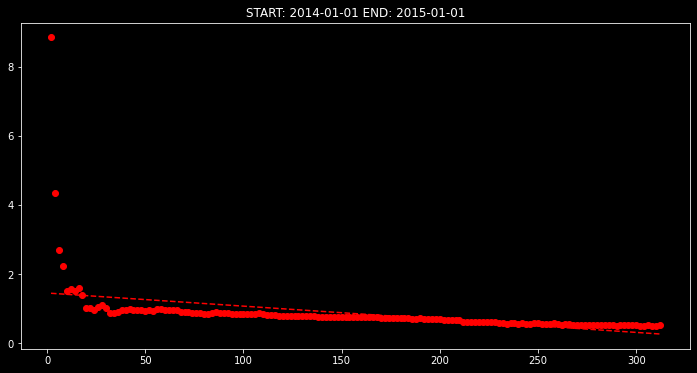

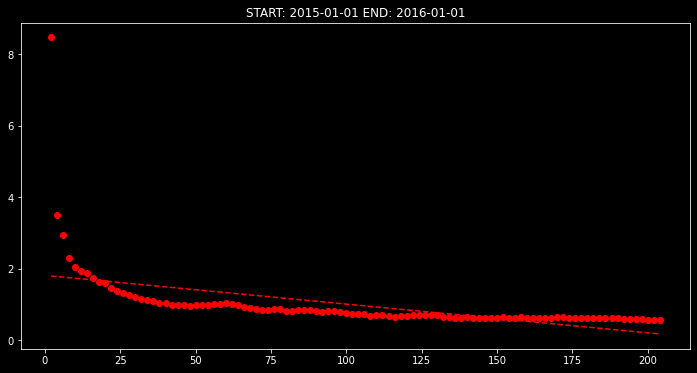

In [21]:
import datetime
dates = [[str(datetime.date(x, 1, 1)), str(datetime.date(x+1, 1, 1))] for x in range(2013, 2016, 1)]

for _ in dates:
    new_hurst(normal_datetime.resample('1D').first(), start_point=_[0], end_point=_[1])

COFF HURST: -0.0026928244091432687


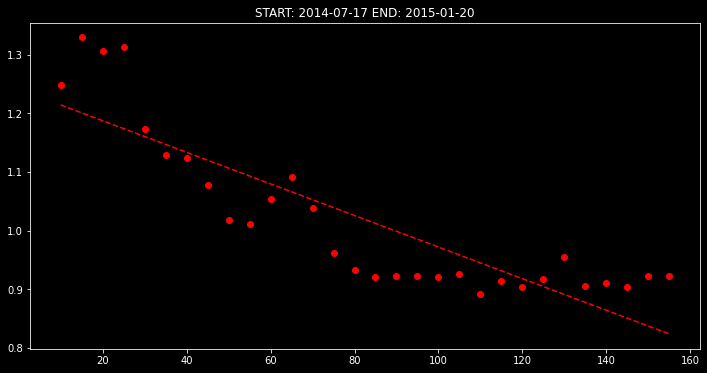

In [29]:
new_hurst(normal_datetime.resample('1D').first(), start_point='2014-07-17', end_point='2015-01-20')